In [113]:
import pandas as pd

df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")

C:\Users\school\AppData\Local\Temp\ipykernel_26448\2192911794.py:3: DtypeWarning: Columns (2,3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")


In [114]:
df.columns

Index(['id', 'chords', 'release_date', 'genres', 'decade', 'rock_genre',
       'artist_id', 'main_genre', 'spotify_song_id', 'spotify_artist_id'],
      dtype='object')

In [115]:
rnb_df = df[df['genres'].str.contains('r&b', case=False, na=False)]


In [116]:
rnb_df.head()

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
14,15,Amin7 Emin Gmaj7 Amin Cmaj7 Emin7 Cmaj7 Amin7 ...,2010-01-01,'canadian contemporary r&b' 'canadian pop' 'ne...,2000.0,NaN,artist_12,soul,3a3Zhb4QJx7r3yxw4j9VVP,1uquUYtkdKei0zuhBY9P0t
39,40,<intro_1> Fmin7 Cmin7 Bbmin9 Fmin7 Cmin7 Bbmin...,1999-01-01,'contemporary r&b' 'r&b',1990.0,NaN,artist_32,soul,2dPEPvdL38EnsZk9E4wu1m,5aEWnrN8h3MhuFUPRfaVuy
75,76,<intro_1> Ebmaj7 F Bbmaj7 Gmin7 <verse_1> Ebma...,2023-04-07,'canadian contemporary r&b',2020.0,NaN,artist_59,soul,3ym8ajVmKm6Fybgov3WBI5,20wkVLutqVOYrc0kxFs7rA
91,92,<verse_1> Amin C E E7 Amin C E E7 Amin C E E7 ...,2022-10-14,'dark r&b',2020.0,NaN,artist_75,soul,62rXTgGmOsUBiIr10BHlTw,3AYZMgvmzNKc3cGmJUSITh
208,209,<intro_1> Fmin Bbmin Eb <verse_1> Fmin Bbmin E...,2022-10-21,'bedroom r&b',2020.0,NaN,artist_126,soul,3eVoB50kvcFMkQ5Gs4naQc,1pmY5q8eybXnnrwOEFqQ1M


In [117]:
rnb_df_first_ten = rnb_df.head(100)

In [118]:
rnb_df_first_ten

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
14,15,Amin7 Emin Gmaj7 Amin Cmaj7 Emin7 Cmaj7 Amin7 ...,2010-01-01,'canadian contemporary r&b' 'canadian pop' 'ne...,2000.0,NaN,artist_12,soul,3a3Zhb4QJx7r3yxw4j9VVP,1uquUYtkdKei0zuhBY9P0t
39,40,<intro_1> Fmin7 Cmin7 Bbmin9 Fmin7 Cmin7 Bbmin...,1999-01-01,'contemporary r&b' 'r&b',1990.0,NaN,artist_32,soul,2dPEPvdL38EnsZk9E4wu1m,5aEWnrN8h3MhuFUPRfaVuy
75,76,<intro_1> Ebmaj7 F Bbmaj7 Gmin7 <verse_1> Ebma...,2023-04-07,'canadian contemporary r&b',2020.0,NaN,artist_59,soul,3ym8ajVmKm6Fybgov3WBI5,20wkVLutqVOYrc0kxFs7rA
91,92,<verse_1> Amin C E E7 Amin C E E7 Amin C E E7 ...,2022-10-14,'dark r&b',2020.0,NaN,artist_75,soul,62rXTgGmOsUBiIr10BHlTw,3AYZMgvmzNKc3cGmJUSITh
208,209,<intro_1> Fmin Bbmin Eb <verse_1> Fmin Bbmin E...,2022-10-21,'bedroom r&b',2020.0,NaN,artist_126,soul,3eVoB50kvcFMkQ5Gs4naQc,1pmY5q8eybXnnrwOEFqQ1M
...,...,...,...,...,...,...,...,...,...,...
9026,9027,<intro_1> G Amin F G Amin F <verse_1> G Amin F...,2017-03-13,'dutch r&b',2010.0,NaN,artist_5286,soul,2KFbw1f6aXj2aPn3tRIKeR,55RKbZHb1yAXuvEHTIyaxJ
9164,9165,<intro_1> Fsmin7 Dmaj7/Fs E/Fs Fsmin7 Dmaj7/Fs...,2022-08-26,'chill r&b',2020.0,NaN,artist_5363,soul,1i92UFFkxtKv4tYNzt1X1b,31SBgHxc8eqZUk9MdveH42
9751,9752,<intro_1> Dmin Amin Dmin Amin <chorus_1> Dmin ...,1999-07-27,'dance pop' 'girl group' 'pop' 'r&b' 'urban co...,1990.0,NaN,artist_3868,pop,5V7ACexC4MHBHcscVjafDu,1Y8cdNmUJH7yBTd9yOvr5i
9905,9906,<intro_1> Emaj7 <verse_1> Amaj7 Emaj7 Amaj7 B ...,NaN,'bedroom r&b',NaN,NaN,artist_767,soul,6R40Gd50bz5ZTB6JTSHVtr,73BLwSX6gsNeVzS7DgI4xe


In [119]:
import pickle, music21, re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [120]:
import re

# Function to normalize chords to music21 format
def normalize_music21_chord(ch):
    if not ch:
        return None

    # Normalize flats and sharps
    ch = ch.replace('b', '-')   # b → - for flats
    ch = ch.replace('#', '#')   # keep sharps
    ch = ch.replace('min7', 'm7')  # minor 7
    ch = ch.replace('min', 'm')    # minor
    ch = ch.replace('M7', 'maj7')  # major 7
    ch = ch.replace('dim6', 'dim') # dim6 → dim
    ch = ch.replace('aug', 'aug')  # keep aug
    ch = ch.replace('sus', 'sus')  # keep sus

    # Fix Bbm, Ebm etc. → B-m, E-m
    ch = re.sub(r'^([A-G])-?m$', r'\1-m', ch)

    # Fix slash chords: ensure root and bass are uppercase
    if '/' in ch:
        parts = ch.split('/')
        root = parts[0].capitalize()
        bass = parts[1].capitalize()
        ch = f'{root}/{bass}'

    # Capitalize root letter for any chord
    m = re.match(r'^([A-Ga-g])([-#]?)(.*)$', ch)
    if m:
        root, accidental, rest = m.groups()
        ch = root.upper() + accidental + rest

    return ch

# Normalize all sequences
first_ten_sequence_normalized = []

# Make sure each entry in rnb_df_first_ten['chords'] is a list of chords
for row in rnb_df_first_ten['chords']:
    if not row:  # skip empty
        first_ten_sequence_normalized.append([])
        continue

    # If the row is a string, split into individual chords (adjust regex if needed)
    if isinstance(row, str):
        # Split based on uppercase letters followed by optional accidentals and chord types
        chords = re.findall(r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?', row)
    else:
        chords = row  # already a list

    # Normalize each chord
    new_song = [normalize_music21_chord(ch) for ch in chords if ch]
    first_ten_sequence_normalized.append(new_song)

# Example: get states
states = set()
for song in first_ten_sequence_normalized:
    states |= set(song)
states = list(states)

print('Normalized first sequence example:', first_ten_sequence_normalized[0])
print('States:', states)


Normalized first sequence example: ['A-m', 'E-m', 'Gmaj7', 'A-m', 'Cmaj7', 'E-m', 'Cmaj7', 'A-m', 'Cmaj7', 'E-m', 'Cmaj7', 'A-m', 'Cmaj7', 'A-m', 'E-m', 'F', 'A-m', 'F', 'C-m', 'B', 'Cmaj7', 'A-m', 'Cmaj7', 'E-m', 'Cmaj7', 'A-m', 'Cmaj7', 'A-m', 'E-m', 'F', 'A-m', 'F', 'C-m', 'B', 'A-m', 'E-m', 'F', 'A-m', 'F', 'C-m', 'B', 'Cmaj7', 'A-m', 'E-m', 'D-m', 'Cmaj7', 'A-m', 'E-m', 'D-m', 'G7', 'Cmaj7', 'A-m', 'E-m', 'D-m', 'G7', 'Cmaj7', 'A-m', 'E-m', 'D-m', 'G7', 'A-m', 'E-m', 'F', 'A-m', 'F', 'C-m', 'B', 'B7', 'A-m', 'E-m', 'F', 'A-m', 'F', 'C-m', 'B', 'B7', 'A-m']
States: ['E9', 'Bmaj7', 'C-m', 'F/G', 'C7/E', 'Asus4', 'G/C', 'C9', 'E', 'Emaj7', 'A/B', 'Dsus2/B', 'C7', 'Bsus4', 'Fmaj7', 'G/A', 'G7', 'A7', 'D/F', 'G-m', 'D7', 'Bdim', 'Cmaj7', 'G7/D', 'Dmaj7', 'Dsus2/G', 'F', 'C', 'Dsus2/C', 'E-m', 'F-m', 'D', 'Asus2', 'B', 'C13', 'G/B', 'G13', 'Amaj7', 'G', 'B-m', 'Esus4', 'E/G', 'Dsus2', 'E7/D', 'Eaug/G', 'Dsus4', 'B7', 'D/E', 'E/F', 'A-m', 'A/C', 'F7', 'Adim', 'E7', 'Gsus2', 'D-m', 'Gmaj7

In [121]:
stream = music21.stream.Stream()
for chord_symbol in states:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi')  



In [122]:
import music21
import re

# get the 6th row (row number 5, 0-based)
chord_sequence = rnb_df_first_ten.iloc[3]['chords']

# if it's a string of chords, split it properly
if isinstance(chord_sequence, str):
    chord_sequence = re.findall(
        r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?',
        chord_sequence
    )

# normalize using your function
chord_sequence = [normalize_music21_chord(ch) for ch in chord_sequence if ch]

# make the stream
stream = music21.stream.Stream()
for chord_symbol in chord_sequence:
    try:
        chord = music21.harmony.ChordSymbol(chord_symbol)
        chord.duration = music21.duration.Duration(2.0)
        stream.append(chord)
    except Exception as e:
        print(f"Skipping {chord_symbol}: {e}")

# write and play
stream.write('midi', fp='music.mid')
stream.show('midi')


In [123]:
first_ten_songs = rnb_df_first_ten["chords"]

In [125]:
S = len(states)
state2idx = {s: i for i, s in enumerate(states)}
tr_counts = np.zeros((S, S), dtype=float)  # rows = from, cols = to (we'll choose rows-from)

for song in first_ten_songs:
    # make sure song is iterable of chords
    if not song or len(song) < 2:
        continue

    # if song is a string, split into chord tokens and normalize
    if isinstance(song, str):
        chords = re.findall(r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?', song)
        chords = [normalize_music21_chord(ch) for ch in chords if ch]
    else:
        chords = song

    # count transitions, skipping chords not in our state index to avoid KeyError
    for t in range(1, len(chords)):
        frm = chords[t - 1]
        to = chords[t]
        if frm not in state2idx or to not in state2idx:
            # skip unknown or malformed tokens (e.g., stray 'm')
            continue
        i = state2idx[frm]
        j = state2idx[to]
        tr_counts[i, j] += 1  # row = from, col = to (intuitive)

# Build DataFrame for readable inspection
print('Transition Counts:\n', tr_counts)

Transition Counts:
 [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0. 36.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  2. 49. ...  1.  5.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [126]:

# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print('State proportions: \n', sums)

State proportions: 
 [[ 14.]
 [ 16.]
 [193.]
 [  2.]
 [  1.]
 [ 12.]
 [ 21.]
 [  3.]
 [398.]
 [ 19.]
 [ 14.]
 [  3.]
 [  2.]
 [  1.]
 [113.]
 [  3.]
 [ 45.]
 [ 47.]
 [ 13.]
 [195.]
 [120.]
 [ 11.]
 [ 65.]
 [  0.]
 [ 45.]
 [  1.]
 [693.]
 [853.]
 [  2.]
 [490.]
 [ 76.]
 [587.]
 [ 18.]
 [338.]
 [  1.]
 [ 25.]
 [  1.]
 [ 42.]
 [803.]
 [352.]
 [ 10.]
 [ 10.]
 [ 33.]
 [ 10.]
 [  2.]
 [  5.]
 [ 35.]
 [  1.]
 [  8.]
 [548.]
 [  1.]
 [  1.]
 [  2.]
 [ 86.]
 [  2.]
 [272.]
 [ 77.]
 [625.]
 [ 16.]]


In [127]:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)
print('Transition Proportions:\n', tr_pr)

Transition Proportions:
 [[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.1865285 0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.0032    0.0784    ... 0.0016    0.008     0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [128]:
tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

           E9  Bmaj7   C-m  F/G  C7/E  Asus4   G/C    C9     E  Emaj7  ...  \
E9       0.00   0.00  0.00  0.0   0.0   0.00  0.00  0.00  0.00   0.00  ...   
Bmaj7    0.00   0.00  0.00  0.0   0.0   0.00  0.00  0.00  0.00   0.00  ...   
C-m      0.00   0.00  0.00  0.0   0.0   0.00  0.00  0.00  0.17   0.00  ...   
F/G      0.00   0.00  0.00  0.0   0.0   0.00  0.00  0.00  0.00   0.00  ...   
C7/E     0.00   0.00  0.00  0.0   0.0   0.00  0.00  0.00  0.00   0.00  ...   
Asus4    0.00   0.00  0.00  0.0   0.0   0.00  0.00  0.00  0.00   0.00  ...   
G/C      0.00   0.00  0.00  0.0   0.0   0.00  0.00  0.00  0.00   0.00  ...   
C9       0.00   0.00  0.00  0.0   0.0   0.00  0.00  0.00  0.00   0.00  ...   
E        0.00   0.00  0.01  0.0   0.0   0.00  0.00  0.01  0.01   0.00  ...   
Emaj7    0.00   0.00  0.00  0.0   0.0   0.00  0.00  0.00  0.05   0.00  ...   
A/B      0.00   0.00  0.00  0.0   0.0   0.00  0.00  0.00  0.07   0.00  ...   
Dsus2/B  0.00   0.00  0.00  0.0   0.0   0.00  0.00  0.00  0.00  

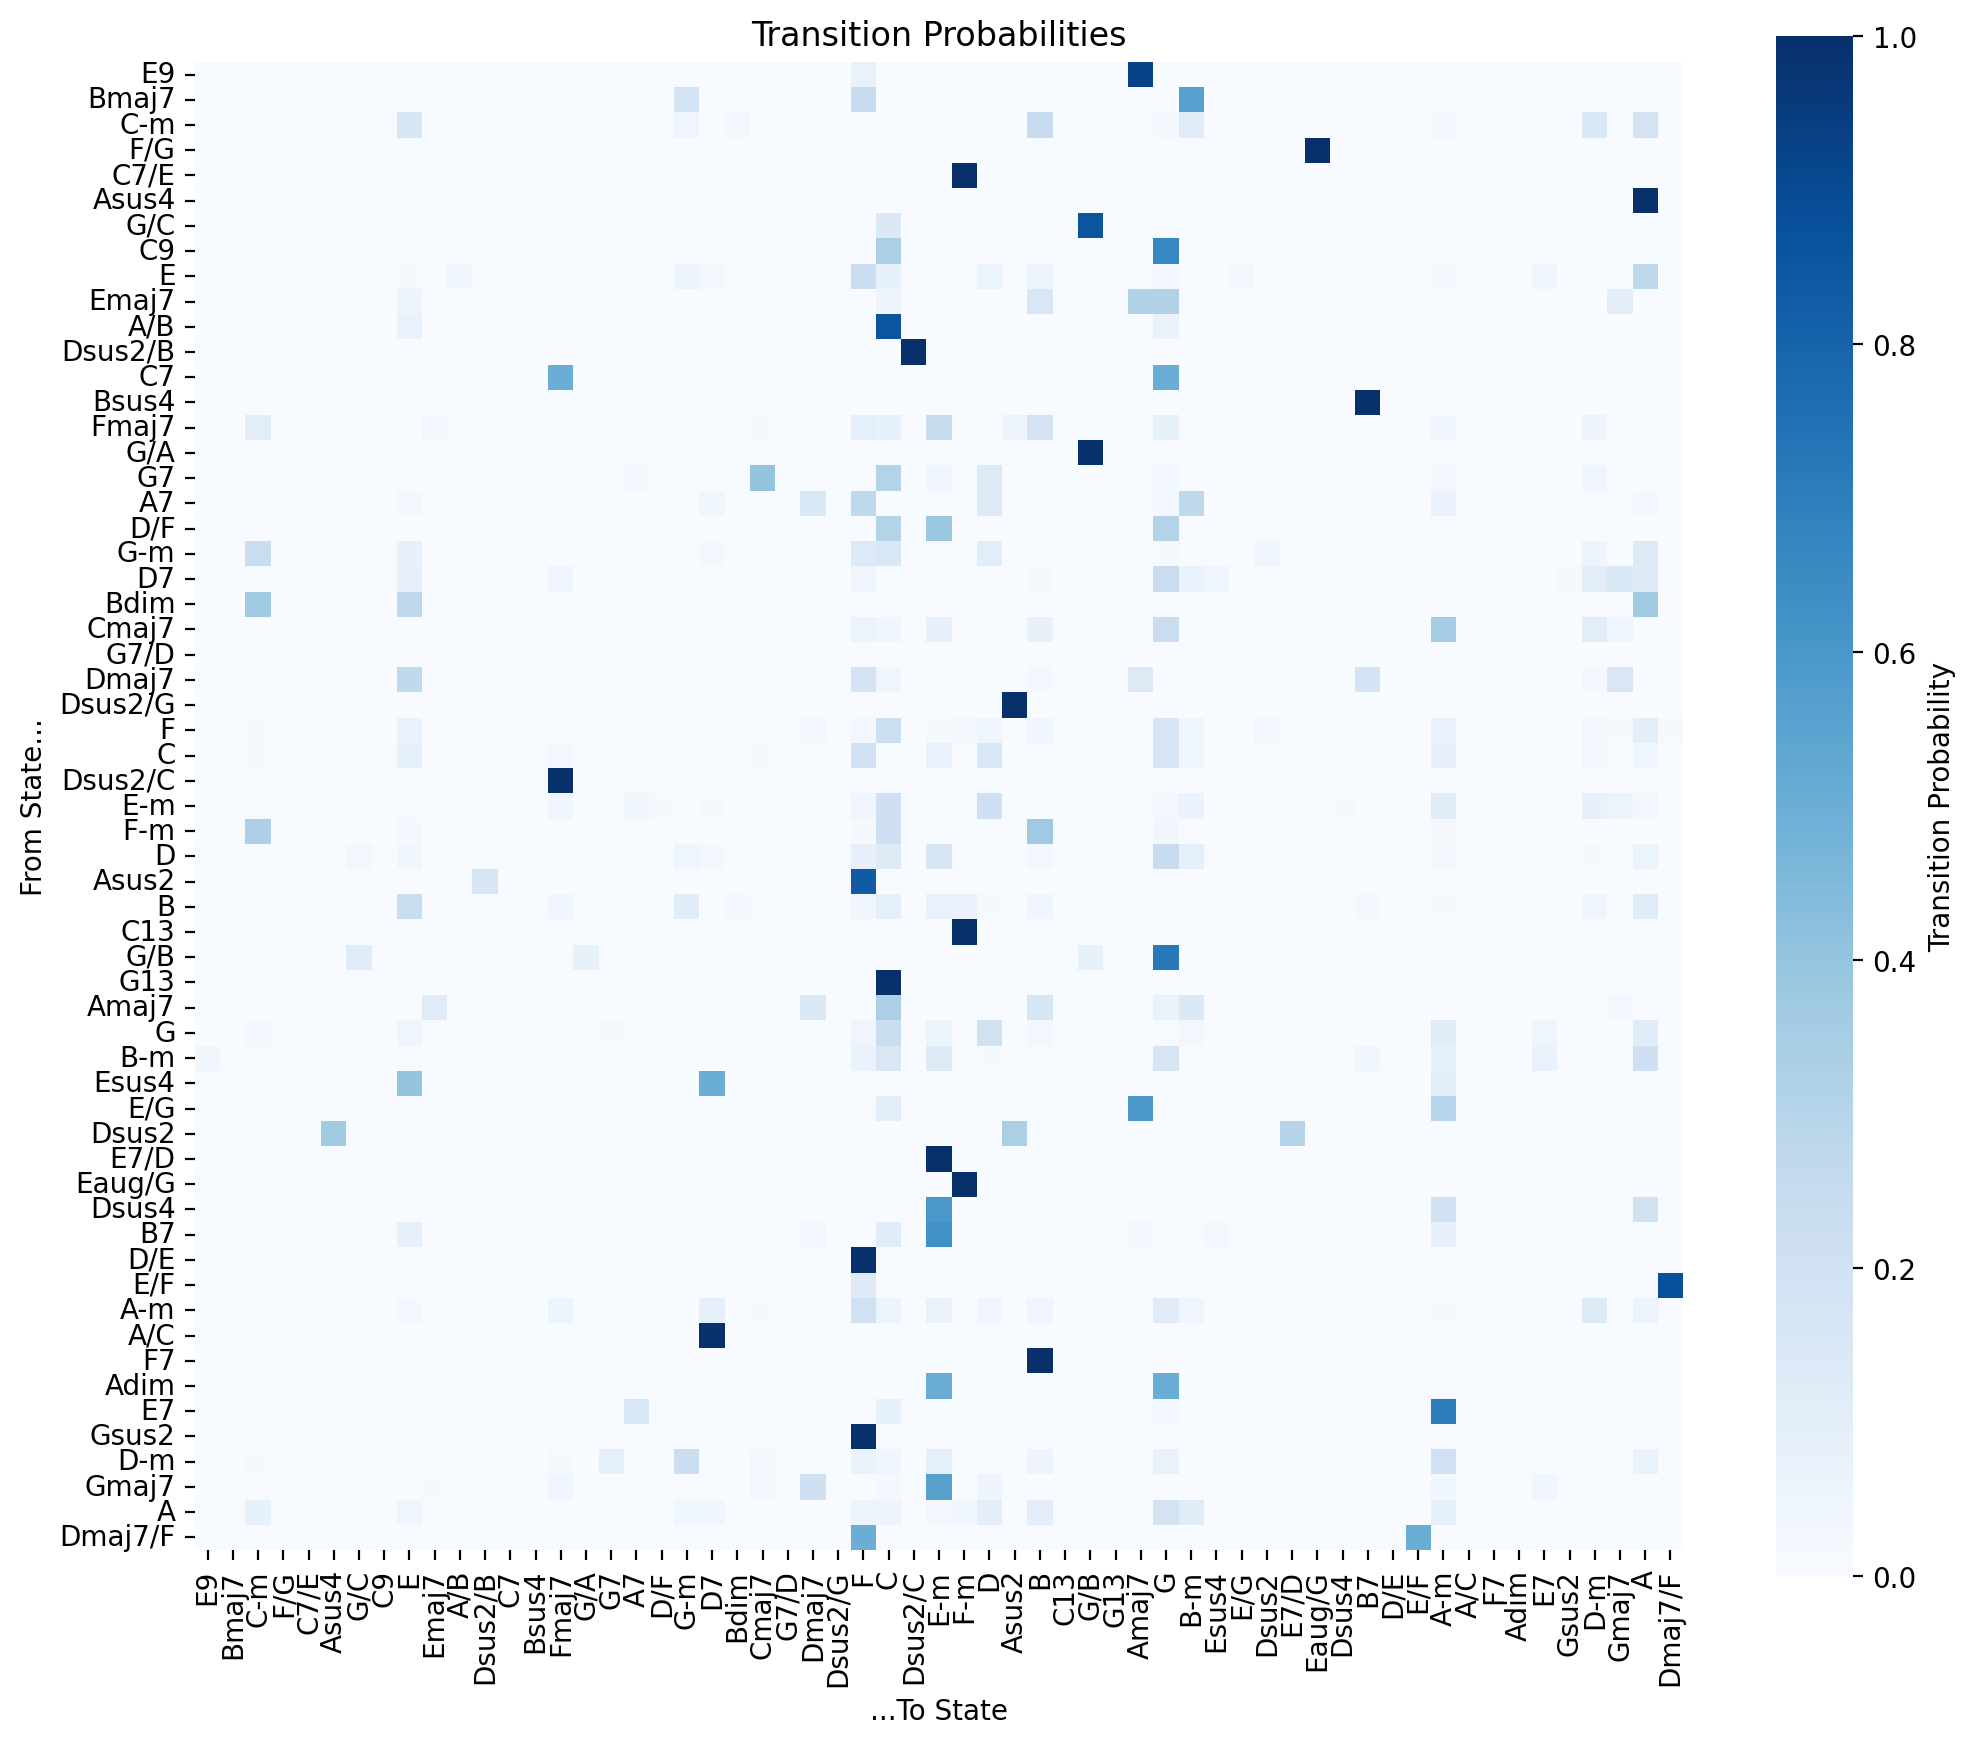

In [129]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [130]:
import numpy as np
import music21

random_pr = 0.5  # not used here, can delete or keep as concept
np.random.seed(100)

initial_state = np.random.choice(states)
print(f'Initial state: {initial_state}')

n_sim = 20
simulation = [initial_state]

for t in range(n_sim - 1):
    next_state = np.random.choice(states)  # pick random chord uniformly
    simulation.append(next_state)

print(simulation)

# Convert to chord symbols for playback
stream = music21.stream.Stream()
for chord_symbol in simulation:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)
    stream.append(chord)

stream.write('midi', fp='music.mid')
stream.show('midi')


Initial state: E
[np.str_('E'), np.str_('Dmaj7'), np.str_('F/G'), np.str_('B-m'), np.str_('G7/D'), np.str_('G/A'), np.str_('E/F'), np.str_('A/B'), np.str_('F-m'), np.str_('Adim'), np.str_('C13'), np.str_('E7'), np.str_('C-m'), np.str_('C13'), np.str_('Fmaj7'), np.str_('C13'), np.str_('A-m'), np.str_('E/F'), np.str_('Dmaj7'), np.str_('G/A')]
